# Some code to realize the idea of exponentially decaying reward

In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from tqdm import tqdm
import sys
import os
import math
import random

# %%

# Reality check

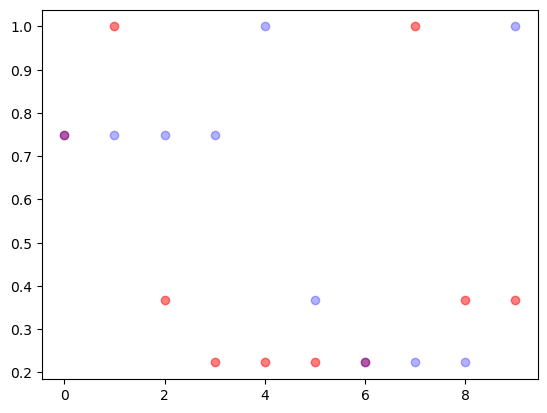

In [2]:
def rewardUpdate(x0, tau, n, prev):
    # The formula for exponential decay is x0 * exp(-tau * n)
    if n == 0:
        # print('Not relevant state')
        new_r = prev
    elif n == 1:
        # print('Transition state')
        new_r = x0
    else:
        # print('Updating')
        new_r = x0 * math.exp(-tau * n)

    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0  # Initialize count to 0

    # If the element at index `idx` in `seq` is not equal to `val`, then there are no consecutive
    # occurrences of `val` ending at `idx`, so we just pass and return count as 0
    if seq[idx] != val:
        pass
    else:
        # Otherwise, we iterate over the sequence in reverse order starting from index `idx`
        # For each element in the sequence, if it is equal to `val`, we increment count by 1
        # If we encounter an element that is not equal to `val`, we break the loop because we only
        # care about consecutive occurrences
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break

    # Return the count of consecutive occurrences of `val`
    return count


s = [0, 0, 0, 1, 1, 1, 0, 0, 1]

initial_reward = 0.75

max_reward = 1.0

r0 = [initial_reward]  # length r0 = len(s) + 1
r0_counter = 0

r1 = [initial_reward]  # length r0 = len(s) + 1
r1_counter = 0

tau = 0.5

for i, state in enumerate(s):
    # counting previous occurences
    r0_counter = consecutiveCounter(s, 0, i)
    r1_counter = consecutiveCounter(s, 1, i)

    # Updating r0
    new_r0 = rewardUpdate(max_reward, tau, r0_counter, r0[-1])
    r0.append(new_r0)

    # Updating r1
    new_r1 = rewardUpdate(max_reward, tau, r1_counter, r1[-1])
    r1.append(new_r1)

    # print(f'State:{state}, r0 counter:{r0_counter}, prev r0:{r0[-1]}, new r0:{new_r0}')


plt.scatter(range(len(r0)), r0, color="r", alpha=0.5)
plt.scatter(range(len(r1)), r1, color="b", alpha=0.3)

# Interactive adding states one by one

In [ ]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display, clear_output


# Function Definitions
def rewardUpdate(x0, tau, n, prev):
    if n == 0:
        new_r = prev
    elif n == 1:
        new_r = x0
    else:
        new_r = x0 * math.exp(-tau * n)
    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0
    if seq[idx] != val:
        pass
    else:
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break
    return count


# Initial Settings
initial_reward = 0.75
r0 = [initial_reward]
r1 = [initial_reward]
tau = 0.5
s = []


def update_plot(s):
    # New Settings
    r0 = [initial_reward]
    r1 = [initial_reward]
    r0_counter = 0
    r1_counter = 0

    for i, state in enumerate(s):
        r0_counter = consecutiveCounter(s, 0, i)
        r1_counter = consecutiveCounter(s, 1, i)
        new_r0 = rewardUpdate(1, tau, r0_counter, r0[-1])
        r0.append(new_r0)
        new_r1 = rewardUpdate(1, tau, r1_counter, r1[-1])
        r1.append(new_r1)

    # Plot
    plt.scatter(range(len(r0)), r0, color="r", alpha=0.5)
    plt.scatter(range(len(r1)), r1, color="b", alpha=0.3)
    plt.show()


# Interactive Input
def on_button_clicked(b):
    s.append(int(text.value))
    clear_output(wait=True)
    update_plot(s)
    display(text, button)


text = widgets.IntText(description="Sequence Input: ", continuous_update=False)
button = widgets.Button(description="Add to sequence")
button.on_click(on_button_clicked)

display(text, button)

# Current

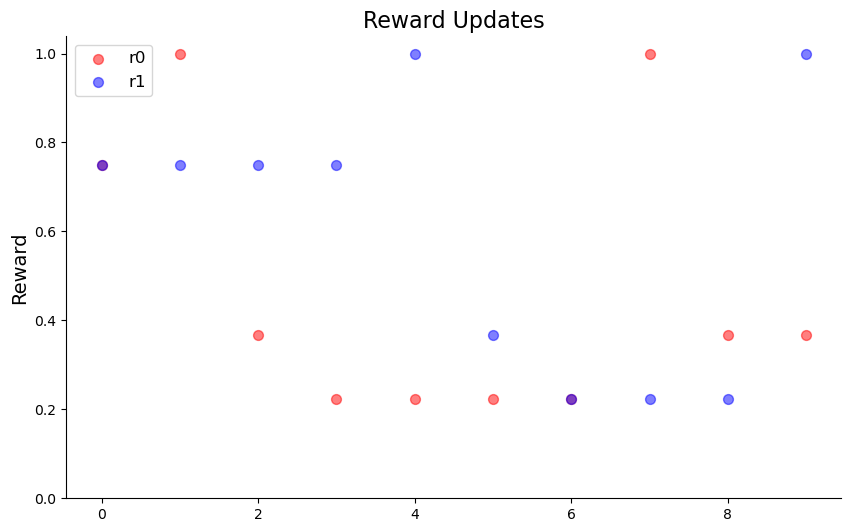

[0, 0, 0, 1, 1, 1, 0, 0, 1]


In [3]:
import matplotlib.pyplot as plt


def rewardUpdate(x0, tau, n, prev):
    if n == 0:
        new_r = prev
    elif n == 1:
        new_r = x0
    else:
        new_r = x0 * math.exp(-tau * n)

    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0
    if seq[idx] != val:
        pass
    else:
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break

    return count


s = [0, 0, 0, 1, 1, 1, 0, 0, 1]

initial_reward = 0.75
max_reward = 1.0

r0 = [initial_reward]
r0_counter = 0

r1 = [initial_reward]
r1_counter = 0

tau = 0.5

for i, state in enumerate(s):
    r0_counter = consecutiveCounter(s, 0, i)
    r1_counter = consecutiveCounter(s, 1, i)

    new_r0 = rewardUpdate(max_reward, tau, r0_counter, r0[-1])
    r0.append(new_r0)

    new_r1 = rewardUpdate(max_reward, tau, r1_counter, r1[-1])
    r1.append(new_r1)


# Plot adjustments
plt.figure(figsize=(10, 6))
plt.scatter(range(len(r0)), r0, color="r", alpha=0.5, label="r0", s=50)
plt.scatter(range(len(r1)), r1, color="b", alpha=0.5, label="r1", s=50)

# plt.plot(range(len(r0)), r0, color="r", alpha=0.5, label="r0", s=50)
# plt.plot(range(len(r1)), r1, color="b", alpha=0.5, label="r1", s=50)

# Adding title and labels
plt.title("Reward Updates", fontsize=16)
# plt.xlabel('Sequence Index', fontsize=14)
plt.ylabel("Reward", fontsize=14)
plt.ylim(0)

# Removing upper and right borders
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Adding legend
plt.legend(fontsize=12)

# Display plot
plt.show()
print(s)

# If entire sequence is given from the start

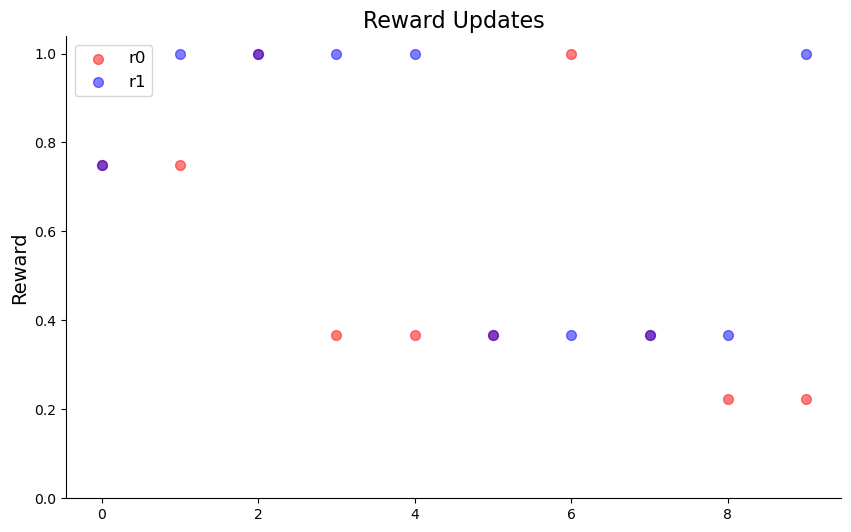

[1, 0, 0, 1, 1, 0, 0, 0, 1]


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def random_state_sequence(length=9):
    # This function generates a random sequence of 0s and 1s
    return np.random.randint(0, 2, length).tolist()


# def other_state_sequence():
#     # This is a placeholder function.
#     # Replace with another function to generate the sequence 's'
#     pass


def rewardUpdate(x0, tau, n, prev): # to process information
    if n == 0:
        new_r = prev
    elif n == 1:
        new_r = x0
    else:
        new_r = x0 * math.exp(-tau * n)

    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0
    if seq[idx] != val:
        pass
    else:
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break

    return count


# Call your desired state sequence function here:
s = (
    random_state_sequence()
)  # Replace this with 'other_state_sequence()' if you want to use another function

initial_reward = 0.75
max_reward = 1.0

r0 = [initial_reward]
r0_counter = 0

r1 = [initial_reward]
r1_counter = 0

tau = 0.5

for i, state in enumerate(s):
    r0_counter = consecutiveCounter(s, 0, i)
    r1_counter = consecutiveCounter(s, 1, i)

    new_r0 = rewardUpdate(max_reward, tau, r0_counter, r0[-1])
    r0.append(new_r0)

    new_r1 = rewardUpdate(max_reward, tau, r1_counter, r1[-1])
    r1.append(new_r1)

# Plot adjustments
plt.figure(figsize=(10, 6))
plt.scatter(range(len(r0)), r0, color="r", alpha=0.5, label="r0", s=50)
plt.scatter(range(len(r1)), r1, color="b", alpha=0.5, label="r1", s=50)

# Adding title and labels
plt.title("Reward Updates", fontsize=16)
# plt.xlabel('Sequence Index', fontsize=14)
plt.ylabel("Reward", fontsize=14)

# Removing upper and right borders
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Adjusting y limit
plt.ylim(0)

# Adding legend
plt.legend(fontsize=12)

# Display plot
plt.show()
print(s)

# Toy examples to create function to feed one step at a time

In [12]:
import numpy as np

def generate_state():
    # Generate a random state (0 or 1) sequentially
    state = np.random.choice([0, 1])
    return state

def process_information(info):
    # Perform some processing based on the received information
    # You can define your own logic here based on the specific requirements
    
    if info == 0:
        # Perform action when info is 0
        print("Received info: 0")
        # Add your custom code here
        
    elif info == 1:
        # Perform action when info is 1
        print("Received info: 1")
        # Add your custom code here
        
    else:
        # Handle any other cases if needed
        print("Invalid info")
        # Add your custom code here

# Example usage
num_steps = 10

for step in range(num_steps):
    state = generate_state()
    process_information(state)


Received info: 0
Received info: 1
Received info: 0
Received info: 0
Received info: 0
Received info: 1
Received info: 0
Received info: 1
Received info: 0
Received info: 0


# Build function to compare states (starting with toy example)

### Simple function


In [15]:
import random

def generate_random_states():
    state_0 = random.uniform(0, 10)
    state_1 = random.uniform(0, 10)

    if state_0 > state_1:
        highest_state = "state_0"
        result_list = [0]
    elif state_1 > state_0:
        highest_state = "state_1"
        result_list = [1]
    else:
        highest_state = "Both states are equal"
        result_list = []

    return state_0, state_1, highest_state, result_list


In [16]:
state_0, state_1, highest_state, result_list = generate_random_states()
print("Random state 0:", state_0)
print("Random state 1:", state_1)
print("Highest state:", highest_state)
print("Result list:", result_list)


Random state 0: 3.5574037606174636
Random state 1: 5.615054645530307
Highest state: state_1
Result list: [1]


### More extended function with plotting

In [57]:
import random
import matplotlib.pyplot as plt

def generate_random_states_1(iterations):
    result_list = []

    for _ in range(iterations):
        state_0 = random.uniform(0, 10)
        state_1 = random.uniform(0, 10)

        if state_0 > state_1:
            highest_state = "state_0"
            result_list.append(0)
        elif state_1 > state_0:
            highest_state = "state_1"
            result_list.append(1)
        else:
            highest_state = "Both states are equal"

        print("Random state 0:", state_0)
        print("Random state 1:", state_1)
        print("Highest state:", highest_state)
        print("Result list:", result_list)
        print()

    colors = ['r' if value == 0 else 'b' for value in result_list]
    plt.scatter(range(len(result_list)), result_list, c=colors, label='Result')
    plt.xlabel('Iteration')
    plt.ylabel('Result')
    plt.title('Random State Results')
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8),
                        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8)],
               labels=['state_0', 'state_1'], loc='upper center', bbox_to_anchor=(0.5, -0.1))
    plt.grid(True)
    plt.yticks([0, 1])  # Set the y-axis ticks to only include 0 and 1
    plt.ylim(-0.5, 1.5)  # Adjust the y-axis limits to move the ticks closer together
    plt.show()

    return result_list


Random state 0: 0.7093064802576188
Random state 1: 2.353842537296954
Highest state: state_1
Result list: [1]

Random state 0: 3.2322896346102112
Random state 1: 0.9086739757199624
Highest state: state_0
Result list: [1, 0]

Random state 0: 4.06036063065195
Random state 1: 0.2568351951690395
Highest state: state_0
Result list: [1, 0, 0]

Random state 0: 7.476750663523707
Random state 1: 1.4426114997048223
Highest state: state_0
Result list: [1, 0, 0, 0]

Random state 0: 3.9186735407288706
Random state 1: 0.5896929863600686
Highest state: state_0
Result list: [1, 0, 0, 0, 0]

Random state 0: 5.951363899712369
Random state 1: 0.3572930397485852
Highest state: state_0
Result list: [1, 0, 0, 0, 0, 0]

Random state 0: 2.831257536162648
Random state 1: 0.8496867838920241
Highest state: state_0
Result list: [1, 0, 0, 0, 0, 0, 0]

Random state 0: 5.532248135365431
Random state 1: 9.734671943467637
Highest state: state_1
Result list: [1, 0, 0, 0, 0, 0, 0, 1]

Random state 0: 8.558688401929736
Ra

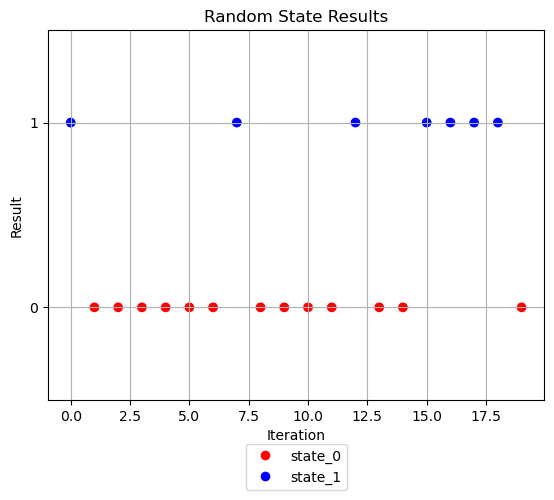

In [44]:
num_iterations = 20  # Adjust the number of iterations as desired
result_list = generate_random_states(num_iterations)


# Turning Reward Function into entire Function

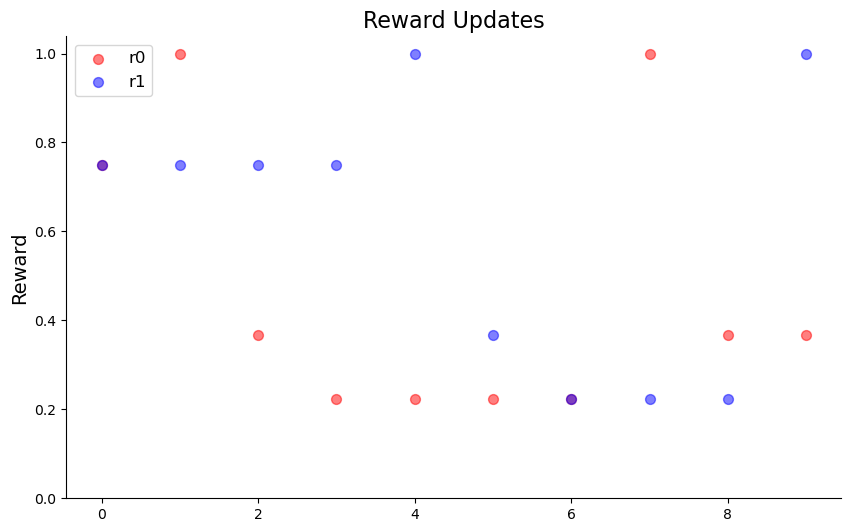

[0, 0, 0, 1, 1, 1, 0, 0, 1]


In [48]:
import matplotlib.pyplot as plt
import math

def reward_plot(sequence, initial_reward, max_reward, tau):
    def rewardUpdate(x0, tau, n, prev):
        if n == 0:
            new_r = prev
        elif n == 1:
            new_r = x0
        else:
            new_r = x0 * math.exp(-tau * n)

        return new_r


    def consecutiveCounter(seq, val, idx):
        count = 0
        if seq[idx] != val:
            pass
        else:
            for state in reversed(seq[: idx + 1]):
                if state == val:
                    count += 1
                else:
                    break

        return count


    r0 = [initial_reward]
    r0_counter = 0

    r1 = [initial_reward]
    r1_counter = 0

    for i, state in enumerate(sequence):
        r0_counter = consecutiveCounter(sequence, 0, i)
        r1_counter = consecutiveCounter(sequence, 1, i)

        new_r0 = rewardUpdate(max_reward, tau, r0_counter, r0[-1])
        r0.append(new_r0)

        new_r1 = rewardUpdate(max_reward, tau, r1_counter, r1[-1])
        r1.append(new_r1)


    # Plot adjustments
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(r0)), r0, color="r", alpha=0.5, label="r0", s=50)
    plt.scatter(range(len(r1)), r1, color="b", alpha=0.5, label="r1", s=50)

    # Adding title and labels
    plt.title("Reward Updates", fontsize=16)
    plt.ylabel("Reward", fontsize=14)
    plt.ylim(0)

    # Removing upper and right borders
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    # Adding legend
    plt.legend(fontsize=12)

    # Display plot
    plt.show()

    return sequence


s = [0, 0, 0, 1, 1, 1, 0, 0, 1]
initial_reward = 0.75
max_reward = 1.0
tau = 0.5

reward_plot(s, initial_reward, max_reward, tau)
print(s)


# Sequential arising states

[1]


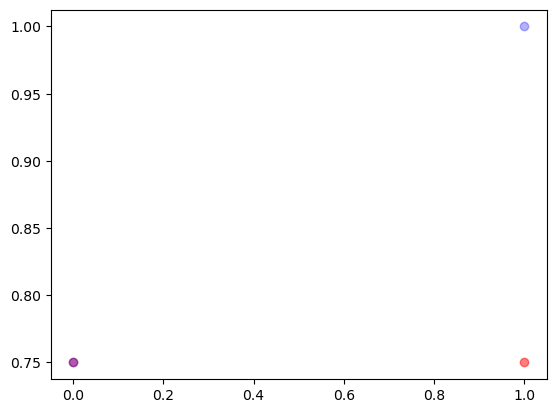

[1, 1]


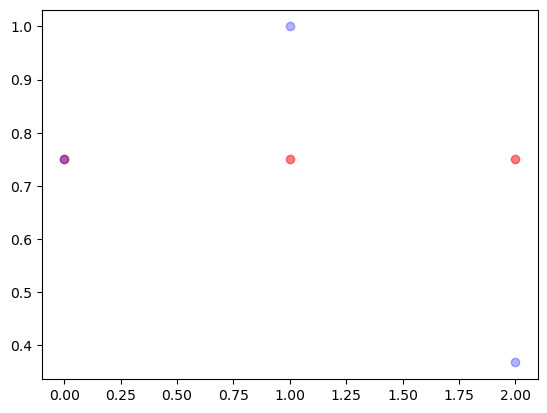

[1, 1, 1]


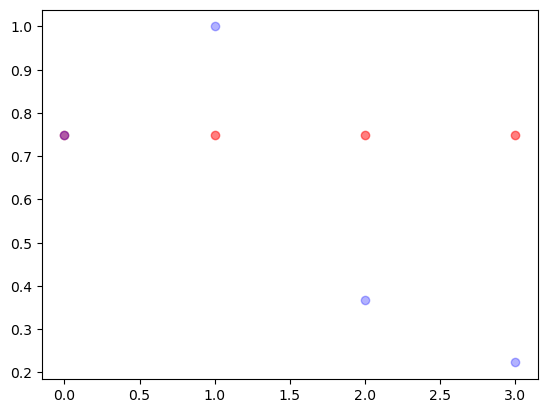

[1, 1, 1, 1]


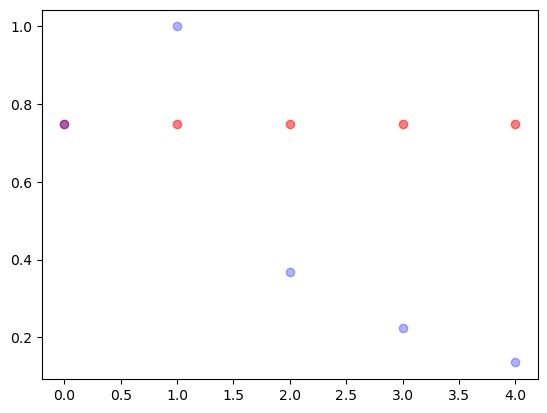

[1, 1, 1, 1, 0]


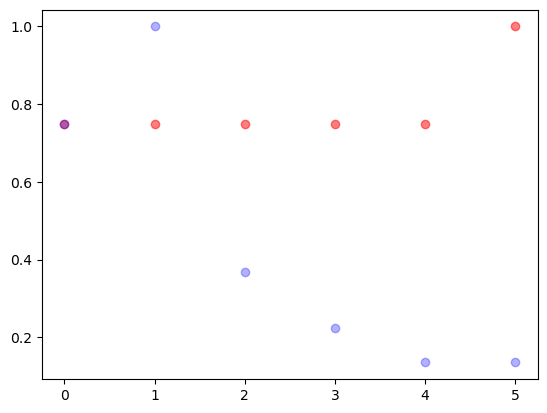

[1, 1, 1, 1, 0, 0]


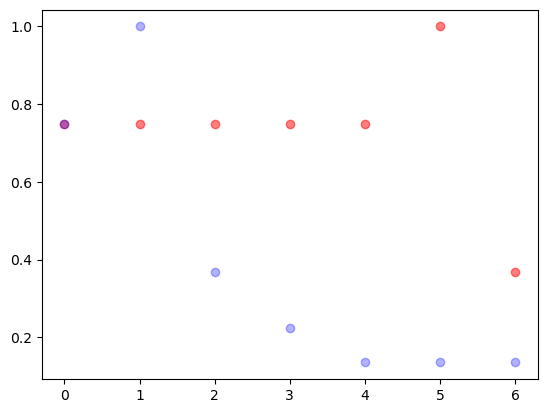

In [89]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display, clear_output


# Function Definitions
def rewardUpdate(x0, tau, n, prev):
    if n == 0:
        new_r = prev
    elif n == 1:
        new_r = x0
    else:
        new_r = x0 * math.exp(-tau * n)
    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0
    if seq[idx] != val:
        pass
    else:
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break
    return count


# Initial Settings
initial_reward = 0.75 #should change it back to 1
r0 = [initial_reward]
r1 = [initial_reward]
tau = 0.5
s = []


def update_plot(steps):
    for i in range(steps):
        s.append(np.random.choice([0, 1]))
        print(s)

        # New Settings
        r0 = [initial_reward]
        r1 = [initial_reward]
        r0_counter = 0
        r1_counter = 0

        for i, state in enumerate(s):
            r0_counter = consecutiveCounter(s, 0, i)
            r1_counter = consecutiveCounter(s, 1, i)
            new_r0 = rewardUpdate(1, tau, r0_counter, r0[-1])
            r0.append(new_r0)
            new_r1 = rewardUpdate(1, tau, r1_counter, r1[-1])
            r1.append(new_r1)

        # Plot
        plt.scatter(range(len(r0)), r0, color="r", alpha=0.5)
        plt.scatter(range(len(r1)), r1, color="b", alpha=0.3)
        plt.show()

update_plot(6)



[0]


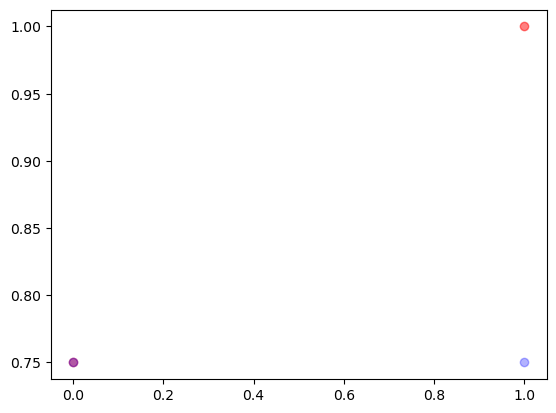

[0, 0]


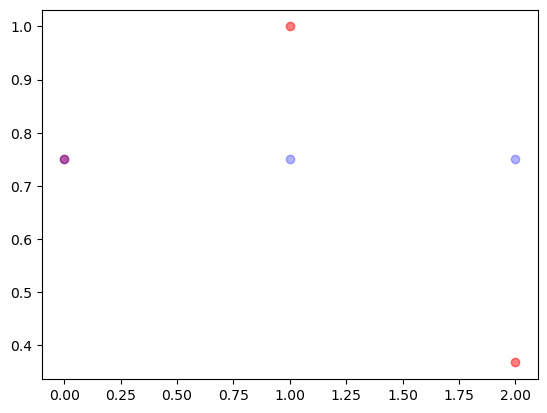

[0, 0, 0]


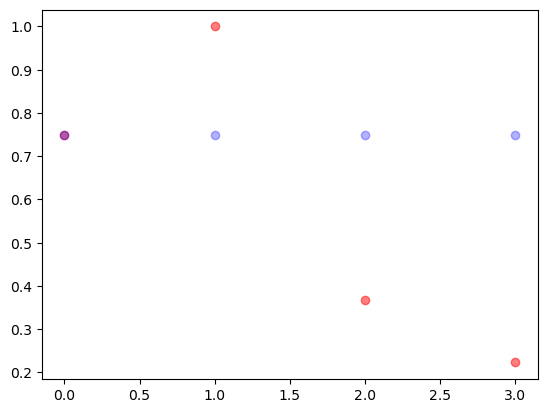

[0, 0, 0, 1]


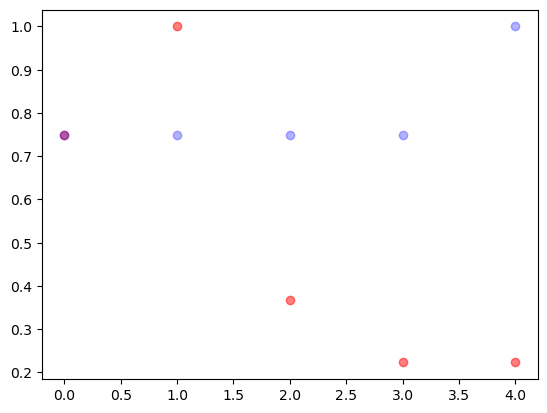

[0, 0, 0, 1, 0]


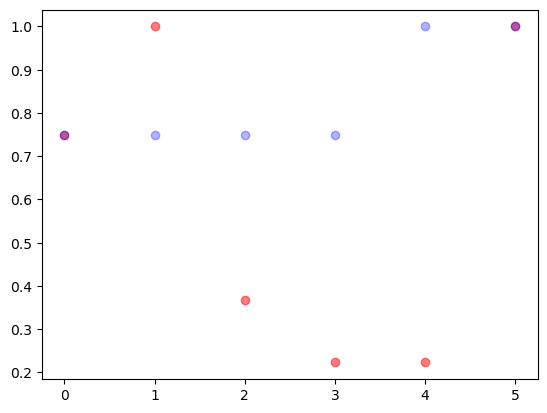

[0, 0, 0, 1, 0, 0]


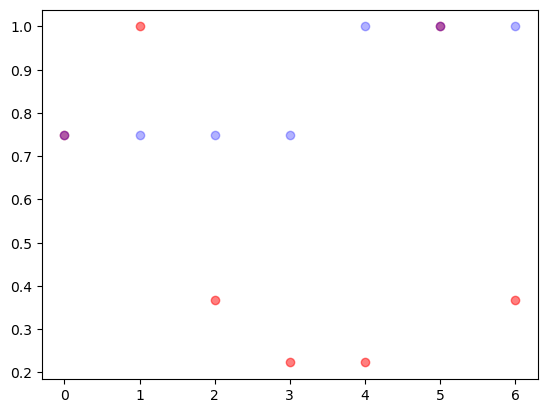

[0, 0, 0, 1, 0, 0, 0]


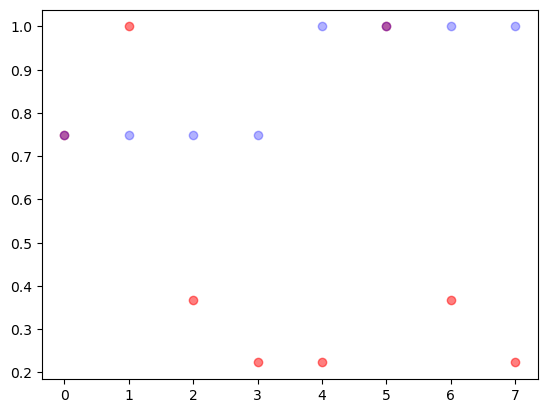

[0, 0, 0, 1, 0, 0, 0, 0]


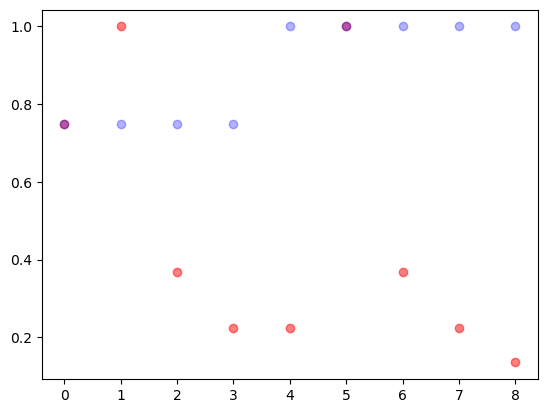

[0, 0, 0, 1, 0, 0, 0, 0, 1]


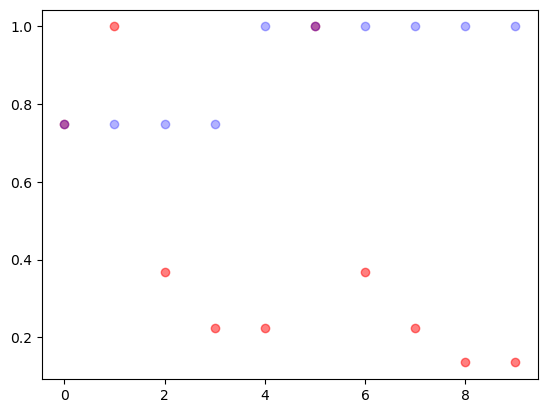

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


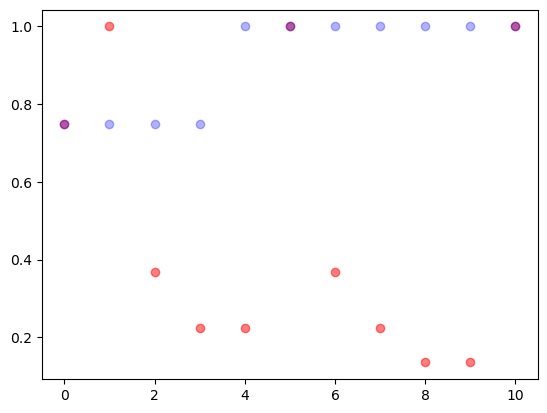

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]


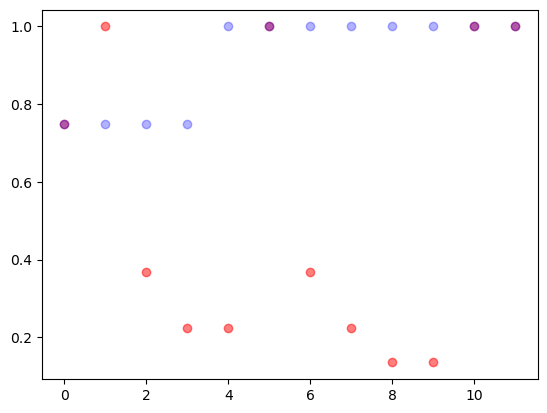

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]


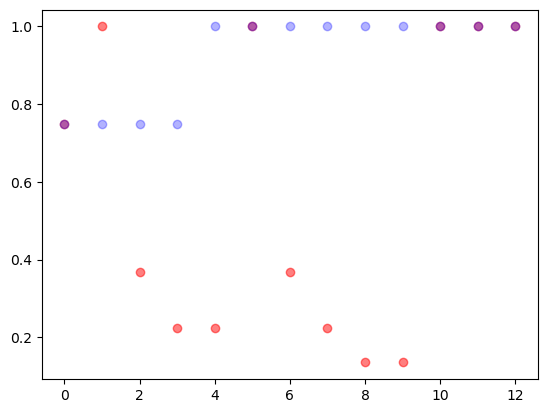

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]


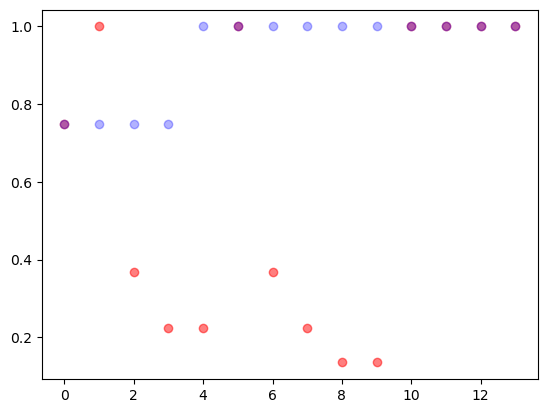

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


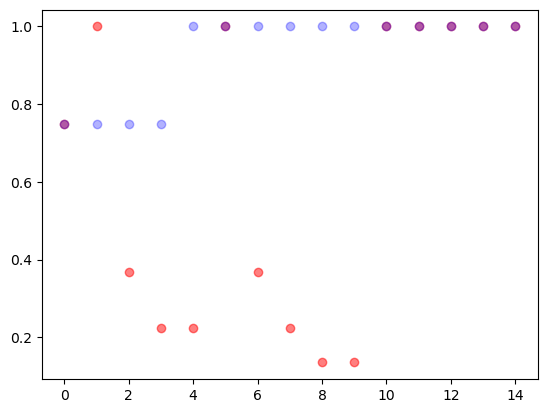

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]


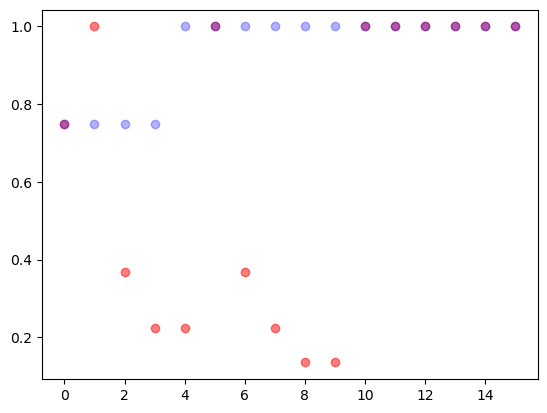

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


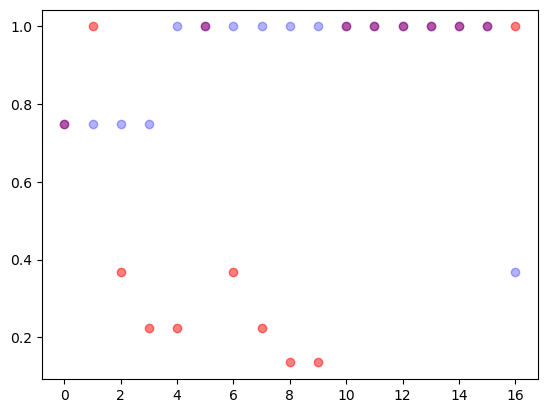

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]


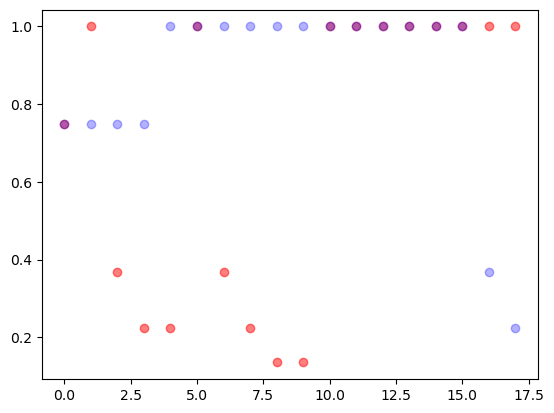

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]


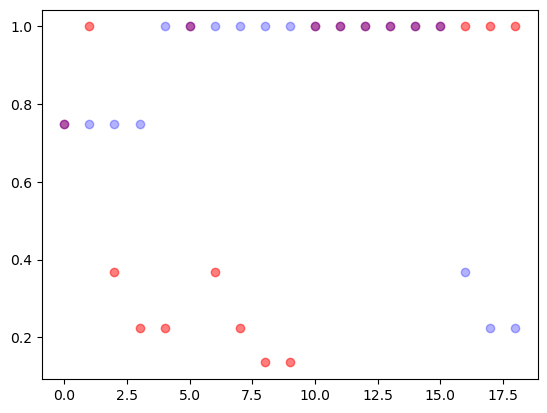

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]


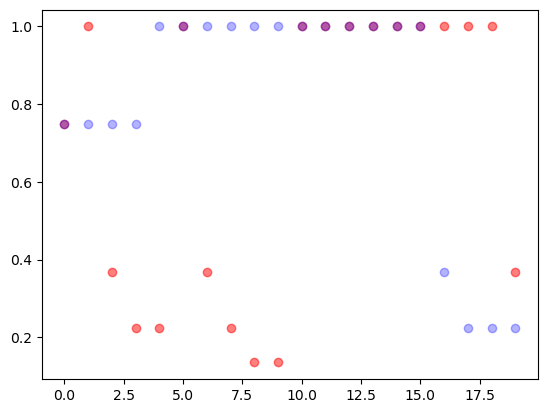

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]


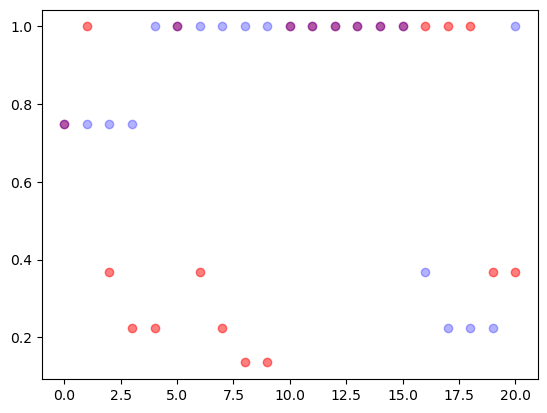

[0.75, 1, 0.36787944117144233, 0.22313016014842982, 0.22313016014842982, 1, 0.36787944117144233, 0.22313016014842982, 0.1353352832366127, 0.1353352832366127, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.36787944117144233, 0.36787944117144233]
[0.75, 0.75, 0.75, 0.75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.36787944117144233, 0.22313016014842982, 0.22313016014842982, 0.22313016014842982, 1]


In [95]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display, clear_output


# Function Definitions
def rewardUpdate(x0, tau, n, prev):
    if n == 0:
        new_r = prev
    elif n == 1:
        new_r = x0
    else:
        new_r = x0 * math.exp(-tau * n)
    return new_r


def consecutiveCounter(seq, val, idx):
    count = 0
    if seq[idx] != val:
        pass
    else:
        for state in reversed(seq[: idx + 1]):
            if state == val:
                count += 1
            else:
                break
    return count


# Initial Settings
initial_reward = 0.75 #should change it back to 1
r0 = [initial_reward]
r1 = [initial_reward]
tau = 0.5
s = []


def update_plot(steps):
    for i in range(steps):
        s.append(np.random.choice([0, 1]))
        print(s)

        # New Settings
        r0 = [initial_reward]
        r1 = [initial_reward]
        r0_counter = 0
        r1_counter = 0

        for i, state in enumerate(s):
            r0_counter = consecutiveCounter(s, 0, i)
            r1_counter = consecutiveCounter(s, 1, i)
            new_r0 = rewardUpdate(1, tau, r0_counter, r0[-1])
            r0.append(new_r0)
            new_r1 = rewardUpdate(1, tau, r1_counter, r1[-1])
            r1.append(new_r1)

        # Plot
        plt.scatter(range(len(r0)), r0, color="r", alpha=0.5)
        plt.scatter(range(len(r1)), r1, color="b", alpha=0.3)
        plt.show()

    print(r0)
    print(r1)

update_plot(20)



[0]


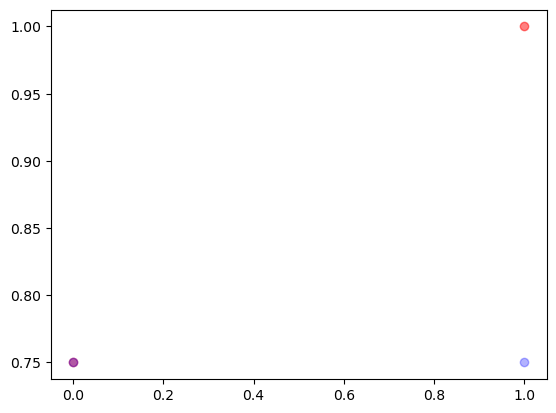

[0, 0]


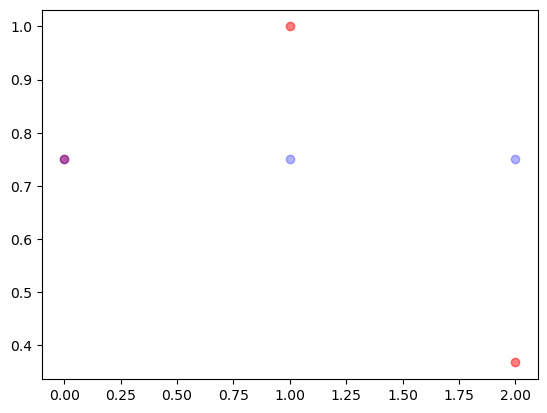

[0, 0, 1]


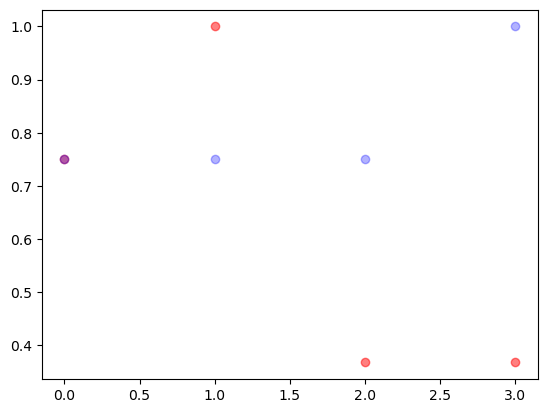

[0, 0, 1, 0]


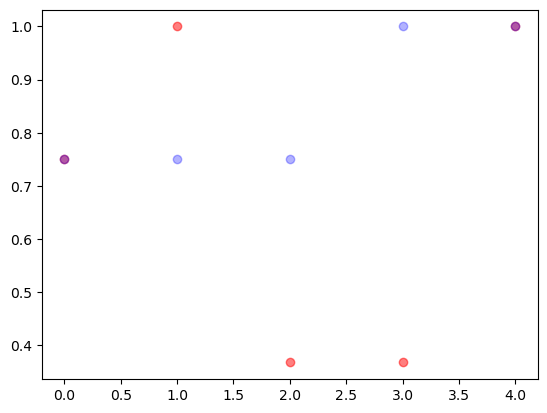

[0, 0, 1, 0, 1]


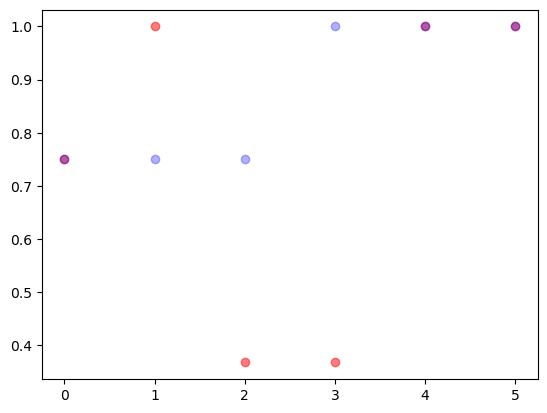

In [94]:
import matplotlib.pyplot as plt
import math
import numpy as np
def plot_rewards(steps):
    # Function Definitions
    def rewardUpdate(x0, tau, n, prev):
        if n == 0:
            new_r = prev
        elif n == 1:
            new_r = x0
        else:
            new_r = x0 * math.exp(-tau * n)
        return new_r
    def consecutiveCounter(seq, val, idx):
        count = 0
        if seq[idx] != val:
            pass
        else:
            for state in reversed(seq[: idx + 1]):
                if state == val:
                    count += 1
                else:
                    break
        return count
    # Initial Settings
    initial_reward = 0.75  # should change it back to 1
    r0 = [initial_reward]
    r1 = [initial_reward]
    tau = 0.5
    s = []
    for i in range(steps):
        s.append(np.random.choice([0, 1]))
        print(s)
        # New Settings
        r0 = [initial_reward]
        r1 = [initial_reward]
        r0_counter = 0
        r1_counter = 0
        for i, state in enumerate(s):
            r0_counter = consecutiveCounter(s, 0, i)
            r1_counter = consecutiveCounter(s, 1, i)
            new_r0 = rewardUpdate(1, tau, r0_counter, r0[-1])
            r0.append(new_r0)
            new_r1 = rewardUpdate(1, tau, r1_counter, r1[-1])
            r1.append(new_r1)
        # Plot
        plt.scatter(range(len(r0)), r0, color="r", alpha=0.5)
        plt.scatter(range(len(r1)), r1, color="b", alpha=0.3)
        plt.show()
plot_rewards(5)